In [2]:
import numpy as np

In [23]:
def read_cloud_csv(file):
    # Leer todo el archivo y dividirlo según la solicitud
    data = np.loadtxt(file, delimiter=',', skiprows=1)

    # Separar la primera línea de los datos
    # Dado que la primera línea son solo encabezados, ajustamos el enfoque:
    # La solicitud original parece haberse malinterpretado debido a los encabezados. 
    # Si se desea incluir realmente la primera línea de datos en un array separado, procederemos de esa manera.
    first_row_data = data[0, :]  # Primer renglón de datos
    rest_data = data[1:, :]  # Resto de los datos

    #first_row_data, rest_data[:5]  # Mostramos la primera fila de datos y las primeras 5 del resto para verificar

    return first_row_data, rest_data


In [25]:
import os

#
Posiciones_robot = []
Nubes = []


# Define la dirección (ruta) en la que deseas buscar los directorios
ruta = 'Nubes'

# Lista todos los archivos y directorios en la ruta especificada
todos_los_elementos = os.listdir(ruta)

# Filtra solo los directorios
solo_directorios = [elemento for elemento in todos_los_elementos if os.path.isdir(os.path.join(ruta, elemento))]

print("Analizando ",len(solo_directorios))

for directorio in solo_directorios:
    ruta_directorio = ruta+"/"+directorio
    #print(ruta_directorio)
    #Lista todos los archivos y directorios en la ruta especificada
    nombres_nubes = os.listdir(ruta_directorio)
    #print(nombres_nubes)
    for nube in nombres_nubes:
        ruta_nubes = ruta_directorio +"/"+nube
        #print(ruta_nubes)
        a,b = read_cloud_csv(ruta_nubes)
        Posiciones_robot.append(a)
        Nubes.append(b)

Posiciones_robot= np.array(Posiciones_robot)

Analizando  101


In [27]:
len(Posiciones_robot)

21188

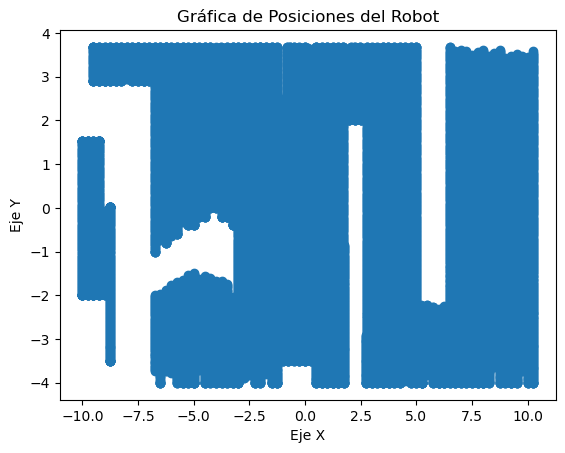

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Dividir el arreglo de coordenadas en dos arreglos x e y
x = Posiciones_robot[:, 0]
y = Posiciones_robot[:, 1]

# Crear la figura y el eje para la gráfica
fig, ax = plt.subplots()

# Graficar los puntos
ax.scatter(x, y)

# Opcional: establecer títulos para los ejes y la gráfica
ax.set_title('Gráfica de Posiciones del Robot')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

# Mostrar la gráfica
plt.show()
